This example implements the first model from "Modeling civil violence: An agent-based computational approach," by Joshua Epstein.  The paper (pdf) can be found [here](http://www.uvm.edu/~pdodds/files/papers/others/2002/epstein2002a.pdf).

The model consists of two types of agents: "Citizens" (called "Agents" in the paper) and "Cops."  Agents decide whether or not to rebel by weighing their unhappiness ('grievance') against the risk of rebelling, which they estimate by comparing the local ratio of rebels to cops.  




In [1]:
import matplotlib.pyplot as plt
import importlib
%matplotlib inline

from epstein_civil_violence.agent import Citizen, Cop
from epstein_civil_violence.model import EpsteinCivilViolence
# importlib.reload(Citizen)
# importlib.reload(Cop)
# importlib.reload(EpsteinCivilViolence)
# # importlib.reload(epstein_civil_violence.agent)
# # importlib.reload(epstein_civil_violence.model)
# print(type(Citizen))
import time

In [2]:
start = time.time()
model = EpsteinCivilViolence(height=40, 
                           width=40, 
                           citizen_density=.7, 
                           cop_density=.074, 
                           citizen_vision=7, 
                           cop_vision=7, 
                           legitimacy=.89, 
                           max_jail_term=50, 
                           max_iters=1000) # cap the number of steps the model takes
model.run_model()

finish = time.time()
print("Time =",finish-start)

Time = 23.663738012313843


The model's data collector counts the number of citizens who are Active (in rebellion), Jailed, or Quiescent after each step.

In [3]:
model_out = model.datacollector.get_model_vars_dataframe()
model_out.head()

,Quiescent,Active,Jailed,Fighting,Legitimacy
0,1145,0,0,0,0.890000
1,1061,80,0,3,0.839249
2,1055,68,0,19,0.835667
3,1055,59,0,28,0.835667
4,1050,59,0,33,0.832080


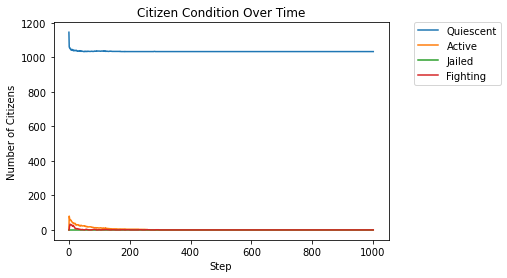

In [4]:
ax = model_out[["Quiescent","Active", "Jailed", "Fighting"]].plot()
ax.set_title('Citizen Condition Over Time')
ax.set_xlabel('Step')
ax.set_ylabel('Number of Citizens')
_ = ax.legend(bbox_to_anchor=(1.35, 1.025))

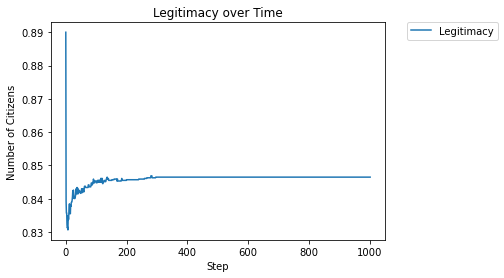

In [5]:
ax = model_out[["Legitimacy"]].plot()
ax.set_title('Legitimacy over Time')
ax.set_xlabel('Step')
ax.set_ylabel('Number of Citizens')
_ = ax.legend(bbox_to_anchor=(1.35, 1.025))

In [7]:
agent_out = model.datacollector.get_agent_vars_dataframe()
agent_out.head()

x  y    breed  jail_sentence  condition  arrest_probability
Step AgentID                                                             
0    0        0  1  citizen            0.0  Quiescent                 NaN
     1        0  2  citizen            0.0  Quiescent                 NaN
     2        0  3  citizen            0.0  Quiescent                 NaN
     3        0  8      cop            NaN       None                 NaN
     4        0  9      cop            NaN       None                 NaN